In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=77fc2bd69d82f8f73e2e971e995f93bdb0fe9b3afaa6b8152388c5bc35a00222
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
from matplotlib.pyplot import subplots
from sklearn.linear_model import \
(LinearRegression ,
LogisticRegression ,
Lasso)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from sklearn.model_selection import \
(train_test_split ,
GridSearchCV)
import statsmodels.api as sm
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [3]:
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset

In [4]:
from torchmetrics import (MeanAbsoluteError ,
R2Score)
from torchinfo import summary
from torchvision.io import read_image

In [5]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger

In [6]:
from pytorch_lightning import seed_everything
seed_everything(0, workers=True)
torch.use_deterministic_algorithms(True , warn_only=True)

In [7]:
from torchvision.datasets import MNIST , CIFAR100
from torchvision.models import (resnet50 ,
ResNet50_Weights)
from torchvision.transforms import (Resize ,
Normalize ,
CenterCrop,
ToTensor)

In [8]:
from ISLP.torch import (SimpleDataModule ,
SimpleModule ,
ErrorTracker ,
rec_num_workers)

In [9]:
from ISLP.torch.imdb import (load_lookup ,
load_tensor ,
load_sparse ,
load_sequential)

In [10]:
from glob import glob
import json

6. Consider the simple function R(#) = sin(#) + #/10.
(a) Draw a graph of this function over the range # " [−6, 6].
(b) What is the derivative of this function?
(c) Given #0 = 2.3, run gradient descent to find a local minimum
of R(#) using a learning rate of / = 0.1. Show each of #0, #1, . . .
in your plot, as well as the final answer.
(d) Repeat with #0 = 1.4.

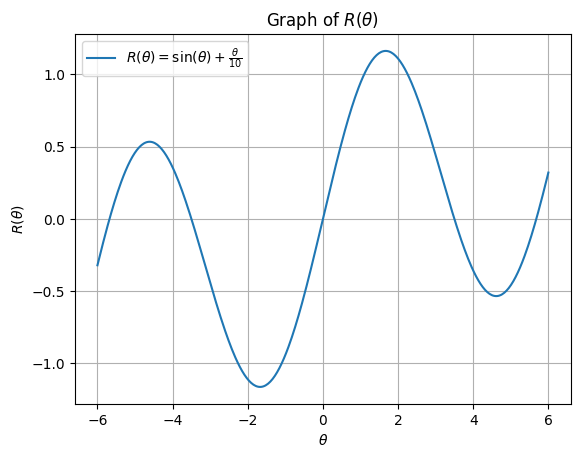

In [11]:
def R(theta):
    return np.sin(theta) + theta / 10

# Generating theta values
theta = np.linspace(-6, 6, 400)
R_values = R(theta)

# Plotting 
plt.plot(theta, R_values, label='$R(\\theta) = \\sin(\\theta) + \\frac{\\theta}{10}$')
plt.xlabel('$\\theta$')
plt.ylabel('$R(\\theta)$')
plt.title('Graph of $R(\\theta)$')
plt.legend()
plt.grid(True)
plt.show()

7. Fit a neural network to the Default data. Use a single hidden layer
with 10 units, and dropout regularization. Have a look at Labs 10.9.1–
10.9.2 for guidance. Compare the classification performance of your
model with that of linear logistic regression.

In [12]:
data = load_data('Default').dropna()

n = data.shape[0]
print(data)

     default student      balance        income
0         No      No   729.526495  44361.625074
1         No     Yes   817.180407  12106.134700
2         No      No  1073.549164  31767.138947
3         No      No   529.250605  35704.493935
4         No      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995      No      No   711.555020  52992.378914
9996      No      No   757.962918  19660.721768
9997      No      No   845.411989  58636.156984
9998      No      No  1569.009053  36669.112365
9999      No     Yes   200.922183  16862.952321

[10000 rows x 4 columns]


In [13]:
data['default'] = data['default'].map({'Yes': 1, 'No': 0})
data['student'] = data['student'].map({'Yes': 1, 'No': 0})
data = data.apply(pd.to_numeric)

In [14]:
print(data.info())
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB
None
      default  student      balance        income
0           0        0   729.526495  44361.625074
1           0        1   817.180407  12106.134700
2           0        0  1073.549164  31767.138947
3           0        0   529.250605  35704.493935
4           0        0   785.655883  38463.495879
...       ...      ...          ...           ...
9995        0        0   711.555020  52992.378914
9996        0        0   757.962918  19660.721768
9997        0        0   845.411989  58636.156984
9998        0        0  1569.009053  36669.112365
9999        0        1   200.922183  16862.952321

[10000 

In [15]:
X = data[['balance', 'income', 'student']]
y = data['default']

(X_train ,
X_test ,
Y_train ,
Y_test) = train_test_split(X,
y,
test_size=1/3,
random_state=1)

# Add a constant (intercept term)
X = sm.add_constant(X)

# Perform logistic regression
model = sm.Logit(Y_test, X_test)
result = model.fit()

# Print the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.114531
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 3334
Model:                          Logit   Df Residuals:                     3331
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Sep 2024   Pseudo R-squ.:                  0.1499
Time:                        00:58:38   Log-Likelihood:                -381.85
converged:                       True   LL-Null:                       -449.16
Covariance Type:            nonrobust   LLR p-value:                 5.824e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance        0.0027      0.000     12.203      0.000       0.002       0.003
income        -0.0002   9.54e

In [16]:
# Predict probabilities on the test set
y_prob_test = result.predict(X_test)

# Convert probabilities to class labels (0 or 1)
yhat_test = (y_prob_test >= 0.5).astype(int)

# Calculate the classification error (mean of incorrect predictions)
classification_error = np.mean(yhat_test != Y_test)

print(f'Classification Error: {classification_error:.4f}')

Classification Error: 0.0333


In [17]:
import torch
import torch.nn as nn
import torchinfo

# Define the neural network model
class DefaultModel(nn.Module):
    def __init__(self, input_size):
        super(DefaultModel, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(input_size, 50),  # input_size should match the number of features
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(50, 1),
            nn.Sigmoid()  # Output layer for binary classification
        )

    def forward(self, x):
        return self.sequential(x)

# Assume X_train has been defined previously and contains the features 'balance', 'income', 'student'
input_size = X_train.shape[1]  # Should be 3 based on the Default dataset features

# Initialize the model
def_model = DefaultModel(input_size)

# Use torchinfo to get the summary
torchinfo.summary(def_model, input_size=(X_train.shape[0], input_size), col_names=['input_size', 'output_size', 'num_params'])


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
DefaultModel                             [6666, 3]                 [6666, 1]                 --
├─Sequential: 1-1                        [6666, 3]                 [6666, 1]                 --
│    └─Linear: 2-1                       [6666, 3]                 [6666, 50]                200
│    └─ReLU: 2-2                         [6666, 50]                [6666, 50]                --
│    └─Dropout: 2-3                      [6666, 50]                [6666, 50]                --
│    └─Linear: 2-4                       [6666, 50]                [6666, 1]                 51
│    └─Sigmoid: 2-5                      [6666, 1]                 [6666, 1]                 --
Total params: 251
Trainable params: 251
Non-trainable params: 0
Total mult-adds (M): 1.67
Input size (MB): 0.08
Forward/backward pass size (MB): 2.72
Params size (MB): 0.00
Estimated Total Size (MB): 2.80

In [18]:
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
X_train_t = torch.tensor(X_train.values.astype(np.float32))
Y_train_t = torch.tensor(Y_train.values.astype(np.float32))
X_test_t = torch.tensor(X_test.values.astype(np.float32))
Y_test_t = torch.tensor(Y_test.values.astype(np.float32))

# Create TensorDatasets
train_dataset = TensorDataset(X_train_t, Y_train_t)
test_dataset = TensorDataset(X_test_t, Y_test_t)

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [19]:
import torch.nn as nn
import torch.optim as optim

class DefaultModel(nn.Module):
    def __init__(self, input_size):
        super(DefaultModel, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(input_size, 50),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(50, 1),
            nn.Sigmoid()  # Output layer for binary classification
        )

    def forward(self, x):
        return self.sequential(x)


In [20]:
import torch
from sklearn.metrics import accuracy_score

# Initialize the model
input_size = X_train.shape[1]  # Should be 3
model = DefaultModel(input_size)

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, dataloader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()  # Remove singleton dimension
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

# Test loop
def test(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs).squeeze()
            all_preds.append(outputs)
            all_labels.append(labels)
    preds = torch.cat(all_preds)
    labels = torch.cat(all_labels)
    return preds, labels

# Train the model
train(model, train_loader, criterion, optimizer)

# Test the model
preds, labels = test(model, test_loader)



preds, labels = test(model, test_loader)

# Convert predictions to binary
y_pred = (preds > 0.5).int()

# Calculate accuracy
y_pred_np = y_pred.numpy()
labels_np = labels.numpy()
classification_error = np.mean(y_pred_np != labels_np)
accuracy = accuracy_score(labels_np, y_pred_np)

print(f'Neural Network Classification Error: {classification_error:.4f}')
print(f'Neural Network Accuracy: {accuracy:.4f}')


Epoch 1/50, Loss: 3.4803
Epoch 2/50, Loss: 3.4964
Epoch 3/50, Loss: 3.5254
Epoch 4/50, Loss: 3.4953
Epoch 5/50, Loss: 3.4953
Epoch 6/50, Loss: 3.4953
Epoch 7/50, Loss: 3.5104
Epoch 8/50, Loss: 3.4953
Epoch 9/50, Loss: 3.4953
Epoch 10/50, Loss: 3.5104
Epoch 11/50, Loss: 3.4953
Epoch 12/50, Loss: 3.4953
Epoch 13/50, Loss: 3.4953
Epoch 14/50, Loss: 3.4953
Epoch 15/50, Loss: 3.5104
Epoch 16/50, Loss: 3.4953
Epoch 17/50, Loss: 3.4953
Epoch 18/50, Loss: 3.4953
Epoch 19/50, Loss: 3.4803
Epoch 20/50, Loss: 3.5104
Epoch 21/50, Loss: 3.5104
Epoch 22/50, Loss: 3.4953
Epoch 23/50, Loss: 3.4953
Epoch 24/50, Loss: 3.5104
Epoch 25/50, Loss: 3.4966
Epoch 26/50, Loss: 3.4953
Epoch 27/50, Loss: 3.4953
Epoch 28/50, Loss: 3.4953
Epoch 29/50, Loss: 3.4953
Epoch 30/50, Loss: 3.4953
Epoch 31/50, Loss: 3.4953
Epoch 32/50, Loss: 3.4953
Epoch 33/50, Loss: 3.4953
Epoch 34/50, Loss: 3.4953
Epoch 35/50, Loss: 3.4953
Epoch 36/50, Loss: 3.4953
Epoch 37/50, Loss: 3.4953
Epoch 38/50, Loss: 3.4953
Epoch 39/50, Loss: 3.

  It appears the classification error is consistent across models. 

From your collection of personal photographs, pick 10 images of animals
(such as dogs, cats, birds, farm animals, etc.). If the subject
does not occupy a reasonable part of the image, then crop the image.
Now use a pretrained image classification CNN as in Lab 10.9.4 to
predict the class of each of your images, and report the probabilities
for the top five predicted classes for each image.

In [21]:
import torch
from torchvision.io import read_image
from torchvision.transforms import Resize, CenterCrop, Normalize
from glob import glob

# Set the path to the manually unzipped folder
extraction_dir = '/kaggle/input/book-images/'


# Image processing steps
resize = Resize((232, 232))
crop = CenterCrop(224)
normalize = Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Load images from the directory
imgfiles = sorted(glob(extraction_dir + '*'))
imgs = torch.stack([torch.div(crop(resize(read_image(f))), 255) for f in imgfiles])

# Normalize the images
imgs = normalize(imgs)

# Check the size of the images tensor
print(imgs.size())

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([5, 3, 224, 224])


In [22]:
resnet_model = resnet50(weights=ResNet50_Weights.DEFAULT)
summary(resnet_model ,
input_data=imgs ,
col_names=['input_size',
'output_size',
'num_params'])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 97.2MB/s]


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
ResNet                                   [5, 3, 224, 224]          [5, 1000]                 --
├─Conv2d: 1-1                            [5, 3, 224, 224]          [5, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [5, 64, 112, 112]         [5, 64, 112, 112]         128
├─ReLU: 1-3                              [5, 64, 112, 112]         [5, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [5, 64, 112, 112]         [5, 64, 56, 56]           --
├─Sequential: 1-5                        [5, 64, 56, 56]           [5, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [5, 64, 56, 56]           [5, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [5, 64, 56, 56]           [5, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [5, 64, 56, 56]           [5, 64, 56, 56]           128
│    │    └─ReLU: 3-3      

In [23]:
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
img_preds = resnet_model(imgs)

In [25]:
img_probs = np.exp(np.asarray(img_preds.detach()))
img_probs /= img_probs.sum(1)[:,None]

In [26]:
labs = json.load(open('/kaggle/input/image-directory/imagenet_class_index.json'))
class_labels = pd.DataFrame([(int(k), v[1]) for k, v in
labs.items()],
columns=['idx', 'label'])
class_labels = class_labels.set_index('idx')
class_labels = class_labels.sort_index()

In [27]:
for i, imgfile in enumerate(imgfiles):
    img_df = class_labels.copy()
    img_df['prob'] = img_probs[i]
    img_df = img_df.sort_values(by='prob', ascending=False)[:3]
    print(f'Image: {imgfile}')
    print(img_df.reset_index().drop(columns=['idx']))

Image: /kaggle/input/book-images/Cape_Weaver.jpg
       label      prob
0    jacamar  0.278434
1  bee_eater  0.047995
2     bulbul  0.039502
Image: /kaggle/input/book-images/Hawk_Fountain.jpg
            label      prob
0  great_grey_owl  0.281774
1            kite  0.042421
2        fountain  0.029358
Image: /kaggle/input/book-images/Hawk_cropped.jpg
    label      prob
0    kite  0.297028
1     jay  0.125653
2  magpie  0.015670
Image: /kaggle/input/book-images/Lhasa_Apso.jpg
             label      prob
0            Lhasa  0.150388
1         Shih-Tzu  0.129438
2  Tibetan_terrier  0.103615
Image: /kaggle/input/book-images/Sleeping_Cat.jpg
       label      prob
0      tabby  0.172463
1  tiger_cat  0.110840
2    doormat  0.089069


9. Fit a lag-5 autoregressive model to the NYSE data, as described in
the text and Lab 10.9.6. Refit the model with a 12-level factor representing
the month. Does this factor improve the performance of the
model?

In [28]:
NYSE = load_data('NYSE')
cols = ['DJ_return', 'log_volume', 'log_volatility']
X = pd.DataFrame(StandardScaler(
                    with_mean=True ,
                    with_std=True).fit_transform(NYSE[cols]),
                columns=NYSE[cols].columns,
                index=NYSE.index)


In [29]:
NYSE.index = pd.to_datetime(NYSE.index)

# Extract the month from the index and create a categorical variable
NYSE['month'] = pd.Categorical(NYSE.index.month, categories=range(1, 13), ordered=True)



print(NYSE)

           day_of_week  DJ_return  log_volume  log_volatility  train month
date                                                                      
1962-12-03         mon  -0.004461    0.032573      -13.127403   True    12
1962-12-04        tues   0.007813    0.346202      -11.749305   True    12
1962-12-05         wed   0.003845    0.525306      -11.665609   True    12
1962-12-06        thur  -0.003462    0.210182      -11.626772   True    12
1962-12-07         fri   0.000568    0.044187      -11.728130   True    12
...                ...        ...         ...             ...    ...   ...
1986-12-24         wed   0.006514   -0.236104       -9.807366  False    12
1986-12-26         fri   0.001825   -1.322425       -9.906025  False    12
1986-12-29         mon  -0.009515   -0.371237       -9.827660  False    12
1986-12-30        tues  -0.001837   -0.385638       -9.926091  False    12
1986-12-31         wed  -0.006655   -0.264986       -9.935527  False    12

[6051 rows x 6 columns]


In [30]:
for lag in range(1, 6):
    for col in cols:
        newcol = np.zeros(X.shape[0]) * np.nan
        newcol[lag:] = X[col].values[:-lag]
        X["{0}_{1}".format(col, lag)] = newcol
X.insert(len(X.columns), 'train', NYSE['train'])
X = X.dropna()

In [31]:
Y, train = X['log_volume'], X['train']
X = X.drop(columns=['train'] + cols)
X.columns

Index(['DJ_return_1', 'log_volume_1', 'log_volatility_1', 'DJ_return_2',
       'log_volume_2', 'log_volatility_2', 'DJ_return_3', 'log_volume_3',
       'log_volatility_3', 'DJ_return_4', 'log_volume_4', 'log_volatility_4',
       'DJ_return_5', 'log_volume_5', 'log_volatility_5'],
      dtype='object')

In [32]:
print(NYSE)

           day_of_week  DJ_return  log_volume  log_volatility  train month
date                                                                      
1962-12-03         mon  -0.004461    0.032573      -13.127403   True    12
1962-12-04        tues   0.007813    0.346202      -11.749305   True    12
1962-12-05         wed   0.003845    0.525306      -11.665609   True    12
1962-12-06        thur  -0.003462    0.210182      -11.626772   True    12
1962-12-07         fri   0.000568    0.044187      -11.728130   True    12
...                ...        ...         ...             ...    ...   ...
1986-12-24         wed   0.006514   -0.236104       -9.807366  False    12
1986-12-26         fri   0.001825   -1.322425       -9.906025  False    12
1986-12-29         mon  -0.009515   -0.371237       -9.827660  False    12
1986-12-30        tues  -0.001837   -0.385638       -9.926091  False    12
1986-12-31         wed  -0.006655   -0.264986       -9.935527  False    12

[6051 rows x 6 columns]


In [33]:
X_rnn = X.to_numpy().reshape((-1,5,3))
X_rnn.shape

(6046, 5, 3)

In [34]:
M = LinearRegression()
M.fit(X[train], Y[train])
M.score(X[~train], Y[~train])

0.4128912938562521

In [35]:
print(train)

date
1962-12-10     True
1962-12-11     True
1962-12-12     True
1962-12-13     True
1962-12-14     True
              ...  
1986-12-24    False
1986-12-26    False
1986-12-29    False
1986-12-30    False
1986-12-31    False
Name: train, Length: 6046, dtype: bool


In [36]:
X.index = pd.to_datetime(X.index)
train.index = pd.to_datetime(train.index)


X_month = pd.merge(X,
pd.get_dummies(NYSE['month']),
on='date')

X_month.columns = X_month.columns.astype(str)

In [37]:
M.fit(X_month[train], Y[train])
M.score(X_month[~train], Y[~train])

0.4167123048568927

In [38]:
ordered_cols = []
for lag in range(5,0,-1):
    for col in cols:
        ordered_cols.append('{0}_{1}'.format(col , lag))
X = X.reindex(columns=ordered_cols)
X.columns

Index(['DJ_return_5', 'log_volume_5', 'log_volatility_5', 'DJ_return_4',
       'log_volume_4', 'log_volatility_4', 'DJ_return_3', 'log_volume_3',
       'log_volatility_3', 'DJ_return_2', 'log_volume_2', 'log_volatility_2',
       'DJ_return_1', 'log_volume_1', 'log_volatility_1'],
      dtype='object')

In [39]:
X_rnn = X.to_numpy().reshape((-1,5,3))
X_rnn.shape

(6046, 5, 3)

In [40]:
import torch.nn as nn
class NYSEModel(nn.Module):
    def __init__(self):
        super(NYSEModel, self).__init__()
        self.rnn = nn.RNN(3,
                          12,
                          batch_first=True)
        self.dense = nn.Linear(12, 1)
        self.dropout = nn.Dropout (0.1)
    def forward(self , x):
        val , h_n = self.rnn(x)
        val = self.dense(self.dropout(val[:,-1]))
        return torch.flatten(val)
nyse_model = NYSEModel()

In [41]:
from torch.utils.data import TensorDataset
datasets = []
for mask in [train, ~train]:
    # Convert X_rnn to a tensor
    X_rnn_t = torch.tensor(X_rnn[mask].astype(np.float32))
    # Use direct boolean indexing with Y
    Y_t = torch.tensor(Y[mask].astype(np.float32).values)
    datasets.append(TensorDataset(X_rnn_t, Y_t))

# Unpack the datasets into train and test sets
nyse_train, nyse_test = datasets

In [42]:
summary(nyse_model ,
input_data=X_rnn_t ,
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
NYSEModel                                [1770, 5, 3]              [1770]                    --
├─RNN: 1-1                               [1770, 5, 3]              [1770, 5, 12]             204
├─Dropout: 1-2                           [1770, 12]                [1770, 12]                --
├─Linear: 1-3                            [1770, 12]                [1770, 1]                 13
Total params: 217
Trainable params: 217
Non-trainable params: 0
Total mult-adds (M): 1.83
Input size (MB): 0.11
Forward/backward pass size (MB): 0.86
Params size (MB): 0.00
Estimated Total Size (MB): 0.97

In [43]:
max_num_workers = rec_num_workers()
nyse_dm = SimpleDataModule(nyse_train,
                           nyse_test,
                           num_workers = min(4, max_num_workers),
                           validation=nyse_test ,
                           batch_size =64)

In [44]:
for idx , (x, y) in enumerate(nyse_dm.train_dataloader()):
    out = nyse_model(x)
    print(y.size(), out.size())
    if idx >= 2:
        break

torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])
torch.Size([64]) torch.Size([64])


In [45]:
nyse_optimizer = RMSprop(nyse_model.parameters(),
lr=0.001)
nyse_module = SimpleModule.regression(nyse_model ,
optimizer=nyse_optimizer ,
metrics={'r2':R2Score()})

In [46]:
nyse_trainer = Trainer(deterministic=True ,
max_epochs=200,
callbacks=[ErrorTracker()])
nyse_trainer.fit(nyse_module,
datamodule=nyse_dm)
nyse_trainer.test(nyse_module,
datamodule=nyse_dm)

2024-09-04 00:59:01.197469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 00:59:01.197619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 00:59:01.373586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6196647882461548     │
│          test_r2          │    0.4119079113006592     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6196647882461548, 'test_r2': 0.4119079113006592}]

10. In Section 10.9.6, we showed how to fit a linear AR model to the
NYSE data using the LinearRegression() function. However, we also
mentioned that we can “flatten” the short sequences produced for
the RNN model in order to fit a linear AR model. Use this latter
approach to fit a linear AR model to the NYSE data. Compare the test
R2 of this linear AR model to that of the linear AR model that we fit
in the lab. What are the advantages/disadvantages of each approach?

In [47]:
datasets = []
for mask in [train , ~train]:
    X_month_t = torch.tensor(
                    np.asarray(X_month[mask]).astype(np.float32))
    Y_t = torch.tensor(np.asarray(Y[mask]).astype(np.float32))
    datasets.append(TensorDataset(X_month_t , Y_t))
month_train , month_test = datasets

In [48]:
month_dm = SimpleDataModule(month_train ,
month_test ,
num_workers=min(4, max_num_workers),
validation=month_test ,
batch_size =64)

In [49]:
class LinearARModel(nn.Module):
    def __init__(self):
        super(LinearARModel, self).__init__()
        self._forward = nn.Sequential(
            nn.Flatten(),
            nn.Linear(27, 1)  # Directly mapping from input to output
        )
    
    def forward(self, x):
        return torch.flatten(self._forward(x))

# Example usage:
model = LinearARModel()

In [50]:
linear_model = LinearARModel()

linear_optimizer = optim.RMSprop(linear_model.parameters(), lr=0.001)

linear_module = SimpleModule.regression(
    linear_model,
    optimizer=linear_optimizer,
    metrics= {'r2': R2Score()})

In [51]:
linear_trainer = Trainer(
    deterministic=True,  # Ensures reproducibility
    max_epochs=20,       # Maximum number of training epochs
    callbacks=[ErrorTracker()]  # Track errors during training
)

# Train the linear model
linear_trainer.fit(linear_module, datamodule=month_dm)

# Test the linear model
linear_trainer.test(linear_module, datamodule=month_dm)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6274399161338806     │
│          test_r2          │    0.4045289158821106     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6274399161338806, 'test_r2': 0.4045289158821106}]

Repeat the previous exercise, but now fit a nonlinear AR model by
“flattening” the short sequences produced for the RNN model.

In [52]:
class NonLinearARModel(nn.Module):
    def __init__(self):
        super(NonLinearARModel , self).__init__()
        self._forward = nn.Sequential(nn.Flatten(),
                                      nn.Linear(27, 32),
                                      nn.ReLU(),
                                      nn.Dropout (0.5),
                                      nn.Linear(32, 1))
    def forward(self , x):
        return torch.flatten(self._forward(x))

In [53]:
nl_model = NonLinearARModel()
nl_optimizer = RMSprop(nl_model.parameters(),
lr=0.001)
nl_module = SimpleModule.regression(nl_model ,
optimizer=nl_optimizer ,
metrics={'r2':R2Score()})

In [54]:
nl_trainer = Trainer(deterministic=True ,
max_epochs=20,
callbacks=[ErrorTracker()])
nl_trainer.fit(nl_module , datamodule=month_dm)
nl_trainer.test(nl_module , datamodule=month_dm)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6029824614524841     │
│          test_r2          │     0.427740216255188     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6029824614524841, 'test_r2': 0.427740216255188}]

It appears this model performs slightly better than the others (including linear AR), having a slightly lower test lost and higher test r2 than the other models. 

13. Repeat the analysis of Lab 10.9.5 on the IMDb data using a similarly
structured neural network. We used 16 hidden units at each of two
hidden layers. Explore the effect of increasing this to 32 and 64 units
per layer, with and without 30% dropout regularization.

In [55]:
(imdb_seq_train ,
imdb_seq_test) = load_sequential(root='data/IMDB')
padded_sample = np.asarray(imdb_seq_train.tensors [0][0])
sample_review = padded_sample[padded_sample > 0][:12]
sample_review [:12]

Retrieving "IMDB_S_train.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_S_test.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_Y_test.npy" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_Y_train.npy" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468], dtype=int32)

In [56]:
lookup = load_lookup(root='data/IMDB')
' '.join(lookup[i] for i in sample_review)

Retrieving "IMDB_word_index.pkl" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


"<START> this film was just brilliant casting location scenery story direction everyone's"

In [57]:
max_num_workers =10
(imdb_train ,
imdb_test) = load_tensor(root='data/IMDB')
imdb_dm = SimpleDataModule(imdb_train ,
imdb_test ,
validation=2000,
num_workers=min(6, max_num_workers),
batch_size =512)

Retrieving "IMDB_X_test.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".
Retrieving "IMDB_X_train.tensor.gz" from "http://imdb.jtaylor.su.domains/jtaylor/data/".


In [58]:
# With drop regularization

class IMDBModel(nn.Module):
    def __init__(self, input_size):
        super(IMDBModel, self).__init__()
        self.dense1 = nn.Linear(input_size, 32)  # 32 units
        self.activation = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)  # 30% dropout
        self.dense2 = nn.Linear(32, 64)  # 64 units
        self.dropout2 = nn.Dropout(0.3)  # 30% dropout
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        val = x
        for _map in [self.dense1, 
                     self.activation, 
                     self.dropout1,   # Apply dropout after the first activation
                     self.dense2, 
                     self.activation, 
                     self.dropout2,   # Apply dropout after the second activation
                     self.output]:
            val = _map(val)
        return torch.flatten(val)



In [59]:
imdb_model = IMDBModel(imdb_test.tensors[0].size()[1])
summary(imdb_model ,
input_size=imdb_test.tensors[0].size(),
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
IMDBModel                                [25000, 10003]            [25000]                   --
├─Linear: 1-1                            [25000, 10003]            [25000, 32]               320,128
├─ReLU: 1-2                              [25000, 32]               [25000, 32]               --
├─Dropout: 1-3                           [25000, 32]               [25000, 32]               --
├─Linear: 1-4                            [25000, 32]               [25000, 64]               2,112
├─ReLU: 1-5                              [25000, 64]               [25000, 64]               --
├─Dropout: 1-6                           [25000, 64]               [25000, 64]               --
├─Linear: 1-7                            [25000, 64]               [25000, 1]                65
Total params: 322,305
Trainable params: 322,305
Non-trainable params: 0
Total mult-adds (G): 8.06
Input size (MB): 1000.30


In [61]:
imdb_optimizer = RMSprop(imdb_model.parameters(), lr=0.001)
imdb_module = SimpleModule.binary_classification(
imdb_model ,
optimizer=imdb_optimizer)

In [62]:
imdb_logger = CSVLogger('logs', name='IMDB')
imdb_trainer = Trainer(deterministic=True ,
max_epochs=30,
logger=imdb_logger ,
callbacks=[ErrorTracker()])
imdb_trainer.fit(imdb_module ,
datamodule=imdb_dm)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (45) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [63]:
test_results = imdb_trainer.test(imdb_module , datamodule=imdb_dm)
test_results

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8646799921989441     │
│         test_loss         │    1.0948801040649414     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.0948801040649414, 'test_accuracy': 0.8646799921989441}]

Noted to have a relatively high accuracy with this model, lets try the other approach. 

In [64]:
# without drop regularization

import torch.nn as nn

class IMDBModel(nn.Module):
    def __init__(self, input_size):
        super(IMDBModel, self).__init__()
        self.dense1 = nn.Linear(input_size, 32)  # 32 units
        self.activation = nn.ReLU()
        self.dense2 = nn.Linear(32, 64)  # 64 units
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        val = x
        for _map in [self.dense1, 
                     self.activation, 
                     self.dense2, 
                     self.activation, 
                     self.output]:
            val = _map(val)
        return torch.flatten(val)


In [65]:
imdb_model = IMDBModel(imdb_test.tensors[0].size()[1])
summary(imdb_model ,
input_size=imdb_test.tensors[0].size(),
col_names=['input_size',
'output_size',
'num_params'])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
IMDBModel                                [25000, 10003]            [25000]                   --
├─Linear: 1-1                            [25000, 10003]            [25000, 32]               320,128
├─ReLU: 1-2                              [25000, 32]               [25000, 32]               --
├─Linear: 1-3                            [25000, 32]               [25000, 64]               2,112
├─ReLU: 1-4                              [25000, 64]               [25000, 64]               --
├─Linear: 1-5                            [25000, 64]               [25000, 1]                65
Total params: 322,305
Trainable params: 322,305
Non-trainable params: 0
Total mult-adds (G): 8.06
Input size (MB): 1000.30
Forward/backward pass size (MB): 19.40
Params size (MB): 1.29
Estimated Total Size (MB): 1020.99

In [66]:
imdb_optimizer = RMSprop(imdb_model.parameters(), lr=0.001)
imdb_module = SimpleModule.binary_classification(
imdb_model ,
optimizer=imdb_optimizer)

In [67]:
imdb_logger = CSVLogger('logs', name='IMDB')
imdb_trainer = Trainer(deterministic=True ,
max_epochs=30,
logger=imdb_logger ,
callbacks=[ErrorTracker()])
imdb_trainer.fit(imdb_module ,
datamodule=imdb_dm)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [68]:
test_results = imdb_trainer.test(imdb_module , datamodule=imdb_dm)
test_results

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8569200038909912     │
│         test_loss         │    1.2868221998214722     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.2868221998214722, 'test_accuracy': 0.8569200038909912}]

Noted that using the drop regularizaion results in a better fitting model for this dataset. 